<a href="https://colab.research.google.com/github/RanudeeFernando/MonoTone/blob/main/notebooks/create_sentiment_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
base_url = "https://raw.githubusercontent.com/RanudeeFernando/MonoTone/main/datasets/"

# List of file names
round2_files = [
    "dynasent-v1.1-round02-dynabench-train.jsonl",
    "dynasent-v1.1-round02-dynabench-dev.jsonl",
    "dynasent-v1.1-round02-dynabench-test.jsonl"
]

# Load and combine
dfs = []
for filename in round2_files:
    url = base_url + filename
    df = pd.read_json(url, lines=True)
    dfs.append(df)

# Combine all
df_all = pd.concat(dfs, ignore_index=True)[["sentence", "gold_label"]]
df_all.columns = ["text", "sentiment"]

# Save to CSV
df_all.to_csv("sentiment_dataset.csv", index=False)

print("Dataset ready and saved as sentiment_dataset.csv")


Dataset ready and saved as sentiment_dataset.csv


In [49]:
display(df_all.head())

,text,sentiment
0,We enjoyed our first and last meal in Toronto ...,positive
1,I tried a new place. I can't wait to return an...,positive
2,"The buffalo chicken was not good, but very cos...",negative
3,That sounds really awful but next time will be...,mixed
4,The hotel offered complimentary breakfast.,positive


In [50]:
df_all.shape

(19975, 2)

In [51]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19975 entries, 0 to 19974
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       19975 non-null  object
 1   sentiment  17839 non-null  object
dtypes: object(2)
memory usage: 312.2+ KB


In [52]:
df_all = df_all.dropna(subset=["sentiment"])
df_all = df_all.reset_index(drop=True)

In [53]:
print("Remaining nulls:\n", df_all.isnull().sum())

Remaining nulls:
 text         0
sentiment    0
dtype: int64


In [54]:
print("Shape of Dataset after removing null values: ")
df_all.shape

Shape of Dataset after removing null values: 


(17839, 2)

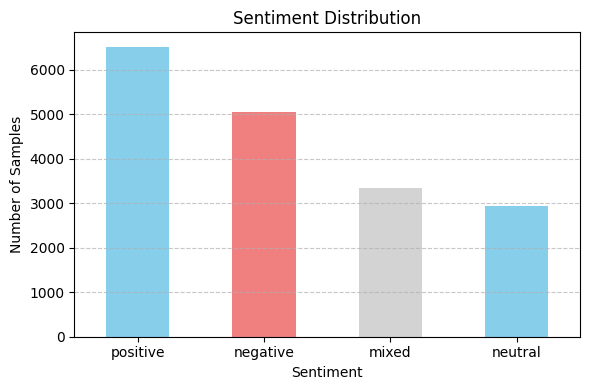

In [56]:
# Count sentiment values
sentiment_counts = df_all["sentiment"].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["skyblue", "lightcoral", "lightgray"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()